In [0]:
# COIL-100 data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
pip install tensorflow==2.1.0

In [0]:
pip install tensorflow-gpu

In [0]:
!ls "/content/drive/My Drive" -a

In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
import  os
import  tensorflow as tf
from    tensorflow import keras
from    tensorflow.keras import layers, optimizers, datasets

In [0]:
from PIL import Image
import numpy as np
import os

train_images = []
train_labels = []
count = 0

for img_path in os.listdir('/content/drive/My Drive/Machine_Learning/VisionProject/'):
      im = Image.open('/content/drive/My Drive/Machine_Learning/VisionProject/' + str(img_path))
      im = im.resize((128, 128))
      train_images.append(np.array(im))
      x=img_path[3:5]
      a=x.split('_')
      train_labels.append(int(a[0]))   

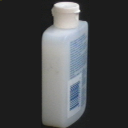

In [0]:
im

In [0]:
from sklearn.model_selection import train_test_split
(x_train, x_val, y_train , y_val) = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [0]:
def prepare_labels(x):
  x = tf.cast(x, tf.float32) / 255.0
  return x

from keras.utils.np_utils import to_categorical

one_hot_train_labels=to_categorical(y_train)
one_hot_test_labels=to_categorical(y_val)

x_train = prepare_labels(x_train)
x_val = prepare_labels(x_val)


Using TensorFlow backend.


In [0]:
x_train.shape

TensorShape([5836, 128, 128, 3])

In [0]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}

from tensorflow.python.keras import models
from tensorflow.python.keras import layers

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3) , activation='relu',input_shape=(128, 128,3),))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3) , activation='relu')) #,padding='same'
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(100 , activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
model.fit(x_train, one_hot_train_labels,epochs=9 , batch_size=128)

Train on 5836 samples
Epoch 1/9
5836/5836 [==============================] - 21s 4ms/sample - loss: 3.6371 - accuracy: 0.2704
Epoch 2/9
5836/5836 [==============================] - 19s 3ms/sample - loss: 0.6632 - accuracy: 0.8256
Epoch 3/9
5836/5836 [==============================] - 20s 3ms/sample - loss: 0.3319 - accuracy: 0.9205
Epoch 4/9
5836/5836 [==============================] - 19s 3ms/sample - loss: 0.1935 - accuracy: 0.9573
Epoch 5/9
5836/5836 [==============================] - 19s 3ms/sample - loss: 0.0895 - accuracy: 0.9803
Epoch 6/9
5836/5836 [==============================] - 19s 3ms/sample - loss: 0.2051 - accuracy: 0.9621
Epoch 7/9
5836/5836 [==============================] - 19s 3ms/sample - loss: 0.0956 - accuracy: 0.9772
Epoch 8/9
5836/5836 [==============================] - 20s 3ms/sample - loss: 0.0848 - accuracy: 0.9868
Epoch 9/9
5836/5836 [==============================] - 19s 3ms/sample - loss: 0.0595 - accuracy: 0.9887


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               2

In [0]:
results=model.evaluate(x_val, one_hot_test_labels)

1459/1459 [==============================] - 1s 952us/sample - loss: 0.0108 - accuracy: 0.9959
